In [31]:
import pandas as pd

In [32]:
import numpy as np

In [33]:
import matplotlib.pyplot as plt

In [34]:
from statsmodels.tsa.arima.model import ARIMA

In [35]:
from statsmodels.tsa.stattools import adfuller

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [37]:
TSales = pd.read_csv("TSales2.csv")

In [38]:
TSales.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [39]:
TSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [40]:
TSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [41]:
pd.to_datetime(TSales['Month-Year'], format = '%b-%y')

0     2003-01-01
1     2003-02-01
2     2003-03-01
3     2003-04-01
4     2003-05-01
         ...    
139   2014-08-01
140   2014-09-01
141   2014-10-01
142   2014-11-01
143   2014-12-01
Name: Month-Year, Length: 144, dtype: datetime64[ns]

In [42]:
TSales['Month-Year'] = pd.to_datetime(TSales['Month-Year'], format = '%b-%y')

In [43]:
TSales

,Month-Year,Number of Tractor Sold
0,2003-01-01,141
1,2003-02-01,157
2,2003-03-01,185
3,2003-04-01,199
4,2003-05-01,203
...,...,...
139,2014-08-01,848
140,2014-09-01,640
141,2014-10-01,581
142,2014-11-01,519


In [44]:
TSales.set_index ('Month-Year', inplace=True)

In [45]:
TSales

,Number of Tractor Sold
Month-Year,
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203
...,...
2014-08-01,848
2014-09-01,640
2014-10-01,581


Text(0.5, 1.0, 'Tractors Sold')

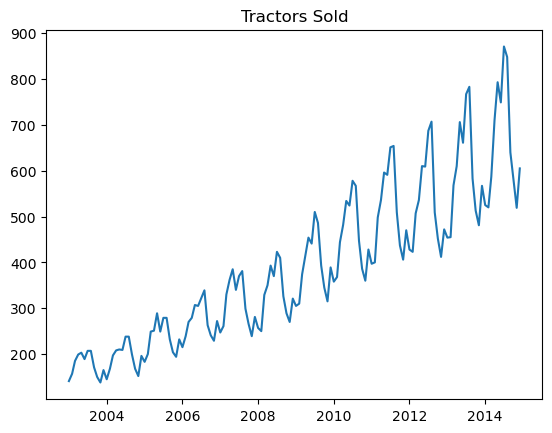

In [46]:
plt.plot(TSales['Number of Tractor Sold'])
plt.title('Tractors Sold')

In [47]:
result = adfuller(TSales, autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')


ADF Statistic: 1.1088250591467343
p-value: 0.9952912415248419
Critical Values:
1%: -3.482087964046026
5%: -2.8842185101614626
10%: -2.578864381347275


In [48]:
sales_diff = TSales.diff().dropna()

In [49]:
sales_diff

,Number of Tractor Sold
Month-Year,
2003-02-01,16.0
2003-03-01,28.0
2003-04-01,14.0
2003-05-01,4.0
2003-06-01,-14.0
...,...
2014-08-01,-23.0
2014-09-01,-208.0
2014-10-01,-59.0


In [50]:
result = adfuller(sales_diff, autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -2.54348077319606
p-value: 0.10525012618272611
Critical Values:
1%: -3.4825006939887997
5%: -2.884397984161377
10%: -2.578960197753906


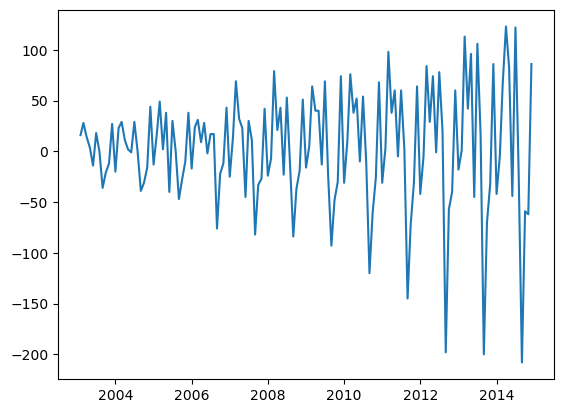

In [51]:
plt.plot(sales_diff['Number of Tractor Sold'])

In [52]:
sales_diff = TSales.diff().dropna()


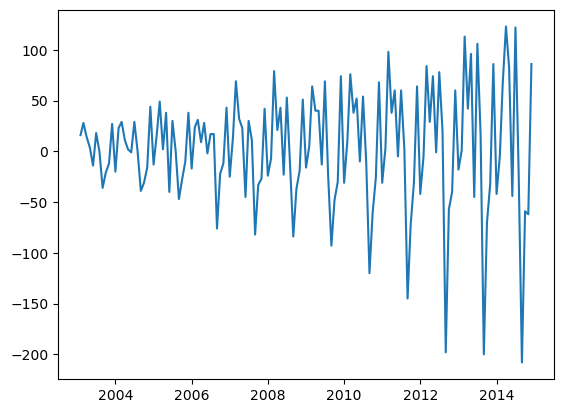

In [53]:
plt.plot(sales_diff['Number of Tractor Sold'])

In [54]:
result = adfuller(sales_diff, autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -2.54348077319606
p-value: 0.10525012618272611
Critical Values:
1%: -3.4825006939887997
5%: -2.884397984161377
10%: -2.578960197753906


In [55]:
sales_diff_diff = sales_diff.diff().dropna()

In [56]:
sales_diff_diff

,Number of Tractor Sold
Month-Year,
2003-03-01,12.0
2003-04-01,-14.0
2003-05-01,-10.0
2003-06-01,-18.0
2003-07-01,32.0
...,...
2014-08-01,-145.0
2014-09-01,-185.0
2014-10-01,149.0


In [57]:
result = adfuller(sales_diff_diff, autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -8.6392573674235
p-value: 5.48254460070825e-14
Critical Values:
1%: -3.4825006939887997
5%: -2.884397984161377
10%: -2.578960197753906


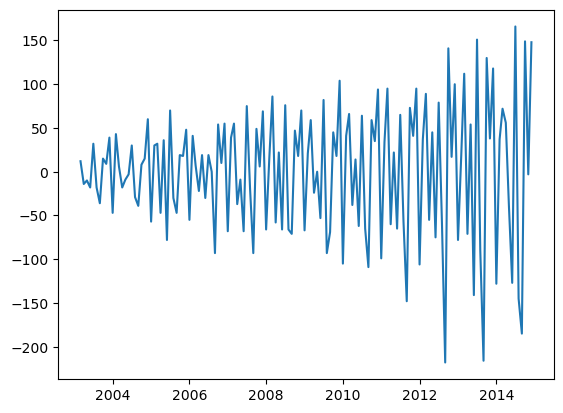

In [58]:
plt.plot(sales_diff_diff['Number of Tractor Sold'])

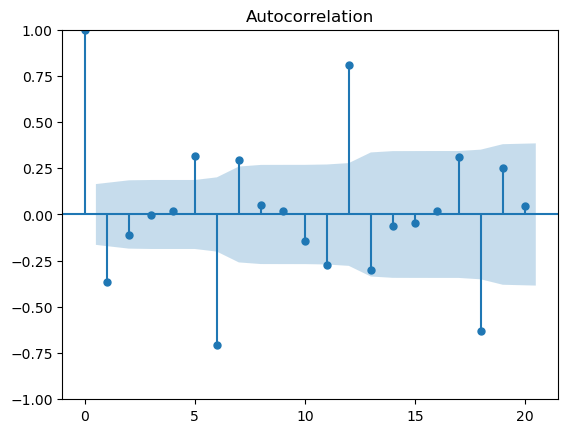

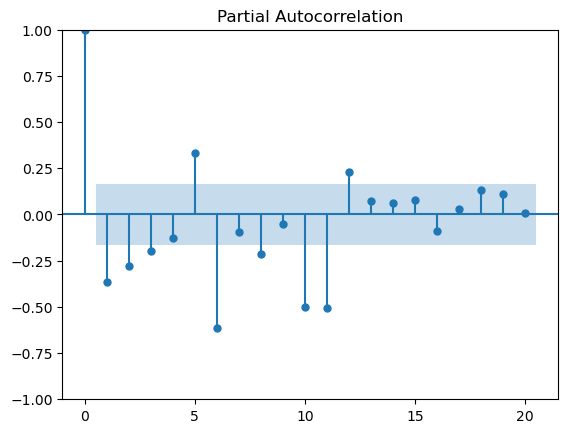

In [62]:
plot_acf(sales_diff_diff, lags=20) # not easy to see the spikes clealry so we will change the lags to 50 to show better
plot_pacf(sales_diff_diff, lags=20, method='ywm')
plt.show()

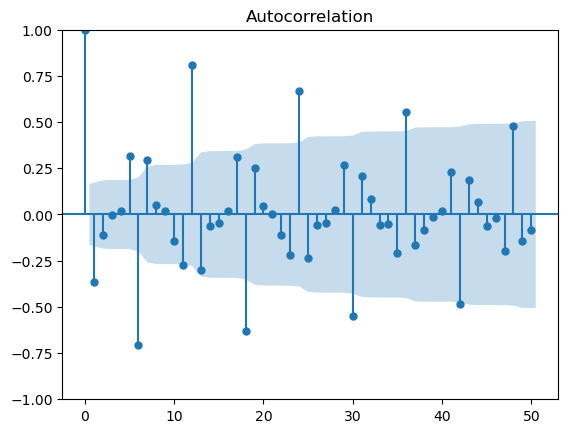

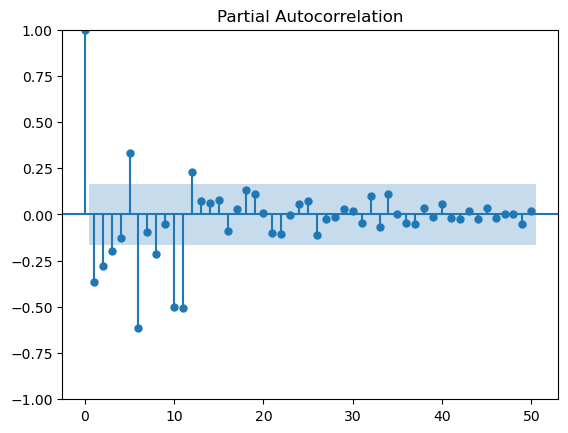

In [64]:
plot_acf(sales_diff_diff, lags=50) # not easy to see the spikes clealry so we will change the lags to 50 to show better
#the big spikes are the more correlated results
plot_pacf(sales_diff_diff, lags=50, method='ywm')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization faile

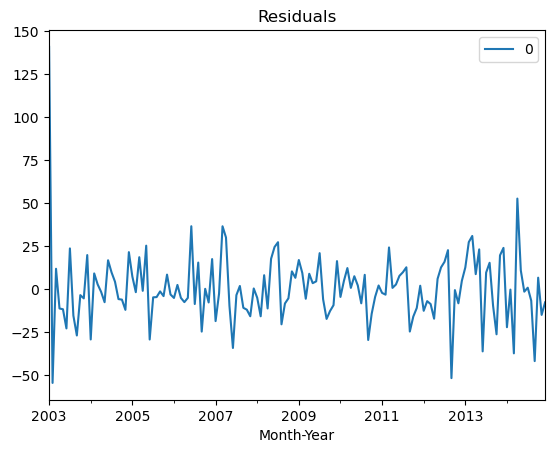

In [70]:
# p = 12, d = 2, q =0
model = ARIMA(TSales, order=(12, 2, 0))
model_fit = model.fit()
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('Residuals')
plt.show()

forecast_steps = 12 # Forecast the next 12 months



In [71]:
forecast_steps = 12 # Forecast the next 12 months
forecast = model_fit.forecast(steps=forecast_steps)
forecast

2015-01-01    572.955660
2015-02-01    533.624685
2015-03-01    627.417101
2015-04-01    747.578418
2015-05-01    819.506940
2015-06-01    793.873764
2015-07-01    909.888084
2015-08-01    865.728307
2015-09-01    696.000040
2015-10-01    620.439995
2015-11-01    553.054419
2015-12-01    652.722034
Freq: MS, Name: predicted_mean, dtype: float64

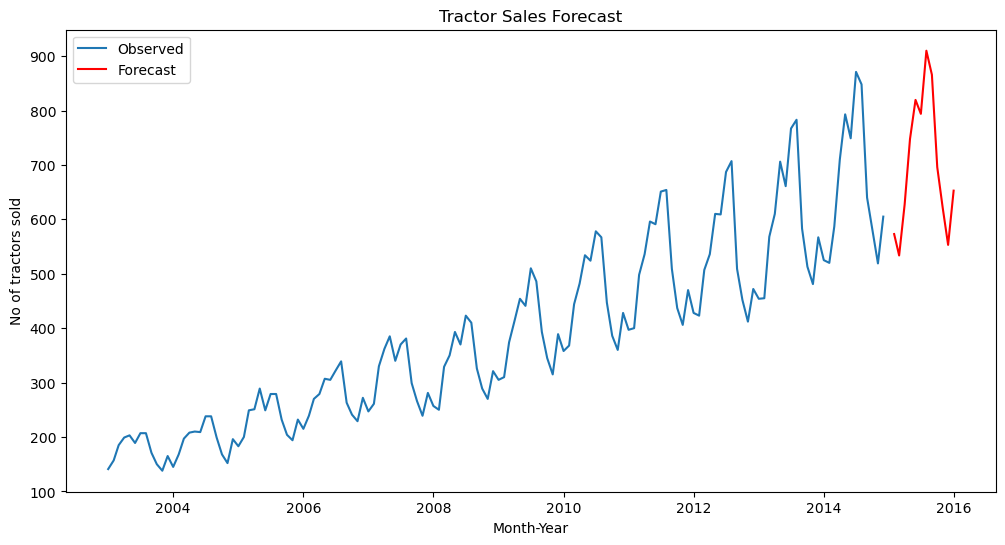

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(TSales, label='Observed')
plt.plot(pd.date_range(start=TSales.index[-1],
                      periods=forecast_steps + 1,
                      freq='M')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('Tractor Sales Forecast')
plt.xlabel('Month-Year')
plt.ylabel('No of tractors sold')
plt.show()

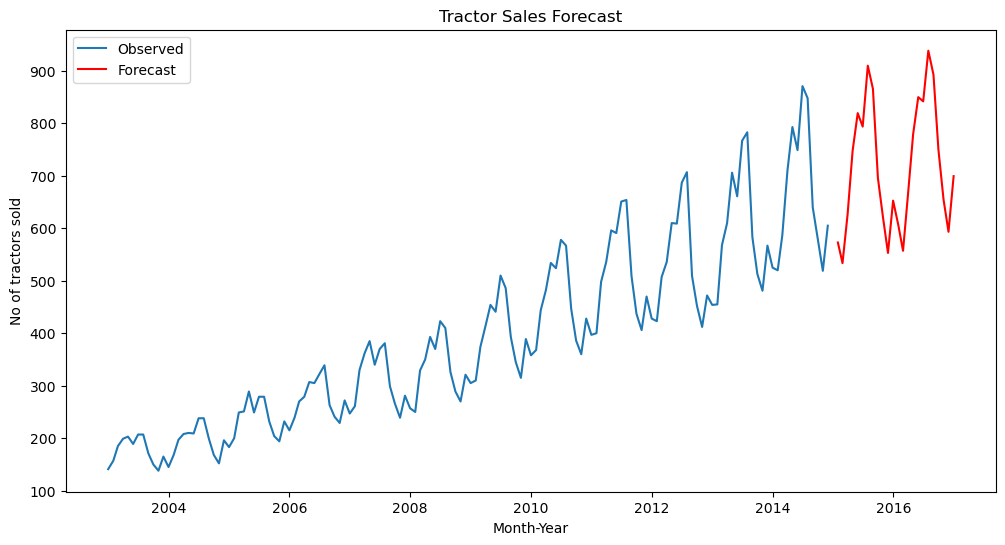

In [81]:
forecast_steps = 24 # Forecast the next 24 months
forecast = model_fit.forecast(steps=forecast_steps)
forecast

plt.figure(figsize=(12, 6))
plt.plot(TSales, label='Observed')
plt.plot(pd.date_range(start=TSales.index[-1],
                      periods=forecast_steps + 1,
                      freq='M')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('Tractor Sales Forecast')
plt.xlabel('Month-Year')
plt.ylabel('No of tractors sold')
plt.show()

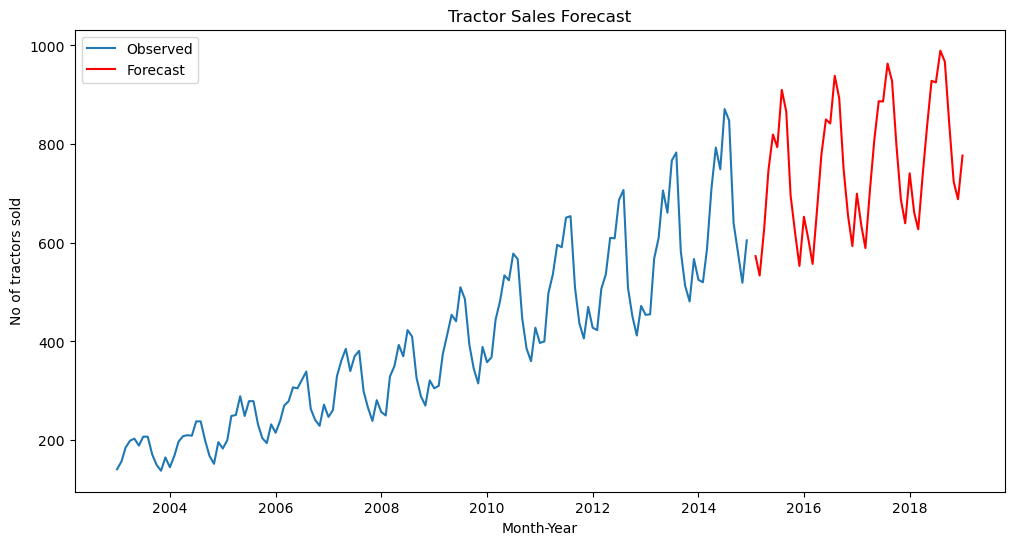

In [82]:
forecast_steps = 48 # Forecast the next 48 months.  Note how the peaks start to decline as the model goes further
forecast = model_fit.forecast(steps=forecast_steps)
forecast

plt.figure(figsize=(12, 6))
plt.plot(TSales, label='Observed')
plt.plot(pd.date_range(start=TSales.index[-1],
                      periods=forecast_steps + 1,
                      freq='M')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('Tractor Sales Forecast')
plt.xlabel('Month-Year')
plt.ylabel('No of tractors sold')
plt.show()